In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
print("Imported basic libraries!")

Imported basic libraries!


In [5]:
df = pd.read_csv('data/Scrape/final.csv')

In [6]:
df

,Title,Citation,Conference,Publisher,Journal,Date,Authors,Abstract,AuthorDCU
0,Efficient cube construction for smart city data,10,Unknown,CEUR-WS. org,Unknown,2016,"Michael Scriney, Mark Roantree","To deliver powerful smart city environments, t...",Michael Scriney
1,Generating cubes from smart city web data,7,Proceedings of the Australasian Computer Scien...,ACM,Unknown,2017,"Michael Scriney, Martin F O'Connor, Mark Roantree",A smart city necessitates the incorporation of...,Michael Scriney
2,Automating Data Mart Construction from Semi-st...,6,Unknown,Oxford University Press,The Computer Journal,2018,"Michael Scriney, Suzanne McCarthy, Andrew McCa...",The global food and agricultural industry has ...,Michael Scriney
3,Predicting customer churn for insurance data,4,International Conference on Big Data Analytics...,"Springer, Cham",Unknown,2020,"Michael Scriney, Dongyun Nie, Mark Roantree",Most organisations employ customer relationshi...,Michael Scriney
4,Attention Based Video Summaries of Live Online...,3,"AAAI-2021 Workshop on AI Education: ""Imagining...",Unknown,Unknown,2021,"Hyowon Lee, Mingming Liu, Hamza Riaz, Navaneet...",This paper describes a system developed to hel...,Michael Scriney
...,...,...,...,...,...,...,...,...,...
4840,Evaluating Automatic-Structure Annotation for ...,Unknown,Unknown,Unknown,Unknown,Unknown,"Aoife Cahill, Mair ้ ead McCarthy, Josef Van G...",Methodologies have been developed (van Genabit...,Andy Way
4841,Contextual Bitext-Derived Paraphrases in Autom...,Unknown,Unknown,Unknown,Unknown,Unknown,"Karolina Owczarzak, Declan Groves, Josef Van G...",In this paper we present a method for deriving...,Andy Way
4842,A Suite of Linguistic Tools for Use with the P...,Unknown,Unknown,Unknown,Unknown,Unknown,"Aoife Cahill, Mairéad McCarthy, Ruth O’Donovan...","(Cahill et al. 2002a, b, 2003) present a metho...",Andy Way
4843,The Creation and Evaluation of an Irish Langua...,Unknown,Unknown,Unknown,Unknown,Unknown,"Bríd de Lóndra, Andy Way",This study exposes the absence of an Irish lan...,Andy Way


# Let's investigate our data for nulls, duplicates and more

In [7]:
# duplicate check
df.duplicated().values.any()

True

In [8]:
# null check
df.isnull().values.any()

False

It is pleasing that we have no null values contained in our data. The presence of duplicates does not surprise us if we are honest. This is because there is every chance when DCU professors collaborate on papers together this paper would appear in both their names on their scholar profiles.

## Plot of DCU scholar profile with most attached papers

In [46]:
df['AuthorDCU'].value_counts()[:20]

Alan Smeaton           797
Gareth Jones           611
Andy Way               512
Cathal Gurrin          414
Tomas Ward             299
Heather J. Ruskin      198
Mark Roantree          151
Rob Brennan            140
Paul M.Clarke          117
Martin Crane           109
Alessandra Mileo       109
Suzanne Little         102
Jennifer Foster        100
Brian Davis             93
Murat Yilmaz            91
Geoff Hamilton          84
Alistair Sutherland     80
Yvette Graham           78
Ray Walshe              73
Annalina Caputo         72
Name: AuthorDCU, dtype: int64

<AxesSubplot:>

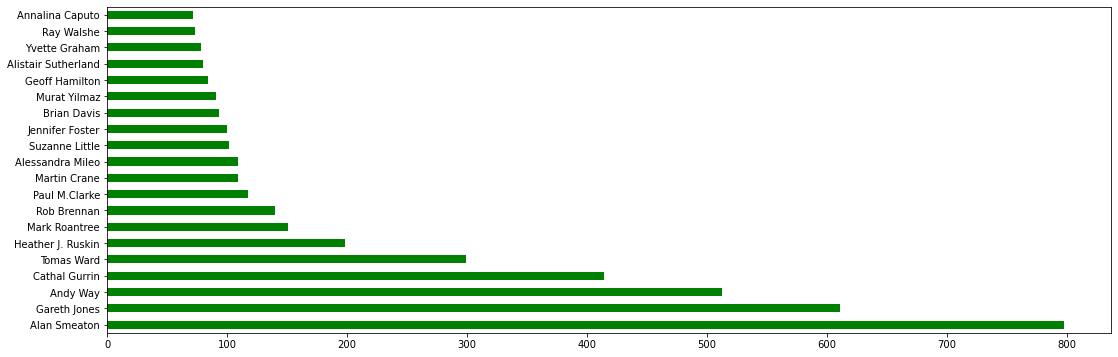

In [10]:
df['AuthorDCU'].value_counts()[:20].plot(kind='barh', color='green', figsize=(18,6))

In [11]:
df.dtypes

Title         object
Citation      object
Conference    object
Publisher     object
Journal       object
Date          object
Authors       object
Abstract      object
AuthorDCU     object
dtype: object

In [14]:
year_values = []
years =  np.array(df['Date'])
for i in range(len(years)):
    if years[i] not in year_values:
        year_values.append(years[i])

In [15]:
year_values

['2016',
 '2017',
 '2018',
 '2020',
 '2021',
 '2019',
 '2015',
 'Unknown',
 '2012',
 '2011',
 '2014',
 '2013',
 '2010',
 '2022',
 '2009',
 '2001',
 '1999',
 '2000',
 '2006',
 '2008',
 '2005',
 '2004',
 '2007',
 '2003',
 '2002',
 '1993',
 '1998',
 '1996',
 '1992',
 '1991',
 '1995',
 '1997',
 '1994',
 '1988',
 '1976',
 '1978',
 '1981',
 '1986',
 '1982',
 '1980',
 '1963',
 '1983',
 '1989',
 '1987',
 '1984',
 '1990',
 '85']

Clearly there are some outliers here and faulty values such as "85". We doubt there was any papers published by DCU staff in 1963 for example. There was other outliers regarding one lecturer in particular, "Charles Daly". There was papers dating back 100 years or more and a plethora of different names being tagged to this professor such as "chuck daly", "cath daly" and more. We decided to remove this instantly before any processing and cleaning on excel.

In [19]:
df.replace({'Citation':{'Unknown':0}}, inplace = True)

In [21]:
df['Citation'] = pd.to_numeric(df['Citation'])

In [22]:
df.dtypes

Title         object
Citation       int64
Conference    object
Publisher     object
Journal       object
Date          object
Authors       object
Abstract      object
AuthorDCU     object
dtype: object